In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

from datetime import date
import datetime

## Settings

In [2]:
sns.set_style("white")
colors = ['#f7fcfd','#e5f5f9','#ccece6','#99d8c9','#66c2a4','#41ae76','#238b45','#006d2c','#00441b'][::-1]
#flatui = ['#7fc97f','#beaed4','#fdc086','#ffff99','#386cb0','#f0027f']
sns.set_palette(colors)

x_size, y_size = 12,8
plt.rcParams.update({'font.size': 16})

## Read and process the data

In [3]:
df = pd.read_csv("data\\telraam.csv")

In [4]:
df.counter_id.unique()

array(['9000000619-1', '9000000619-2', '9000001783-1', '9000001783-2',
       '9000000656-1', '9000000656-2', '9000000655-1', '9000000655-2',
       '9000000820-1', '9000000820-2', '9000001506-1', '9000001506-2',
       '9000001950-1', '9000001950-2', '9000000529-1', '9000000529-2',
       '9000001092-1', '9000001092-2'], dtype=object)

## Remove the prefix

In [5]:
df["counter_id"] = [c.replace("900000","") for c in df["counter_id"]]

## Distributions

In [6]:
counter_ids = df.counter_id.unique()

### Basic

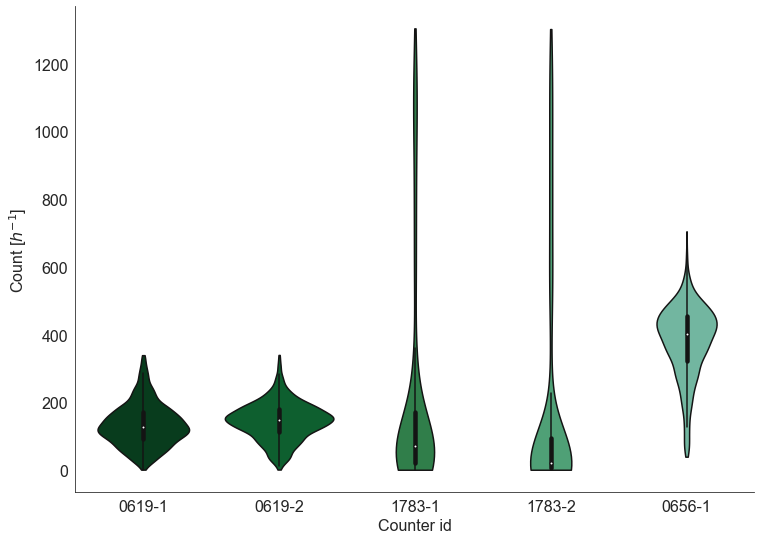

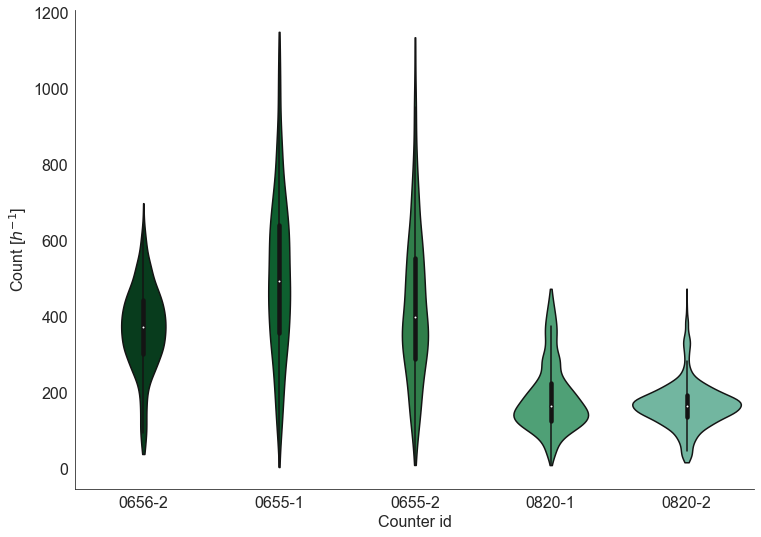

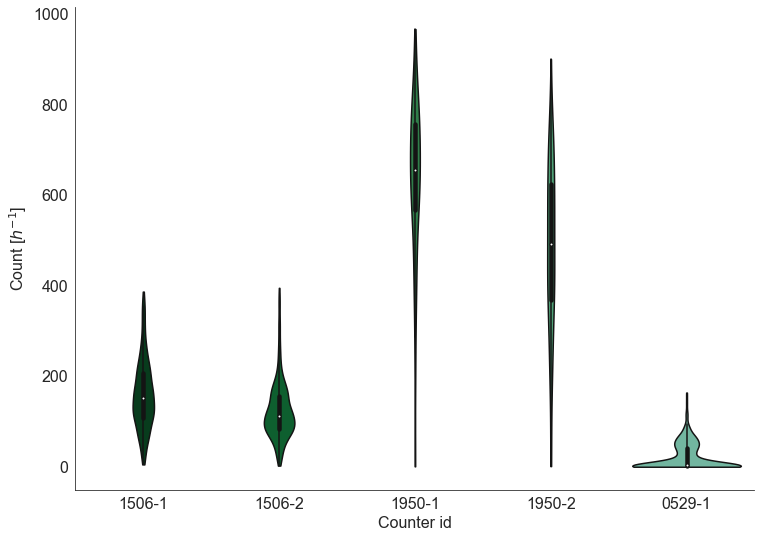

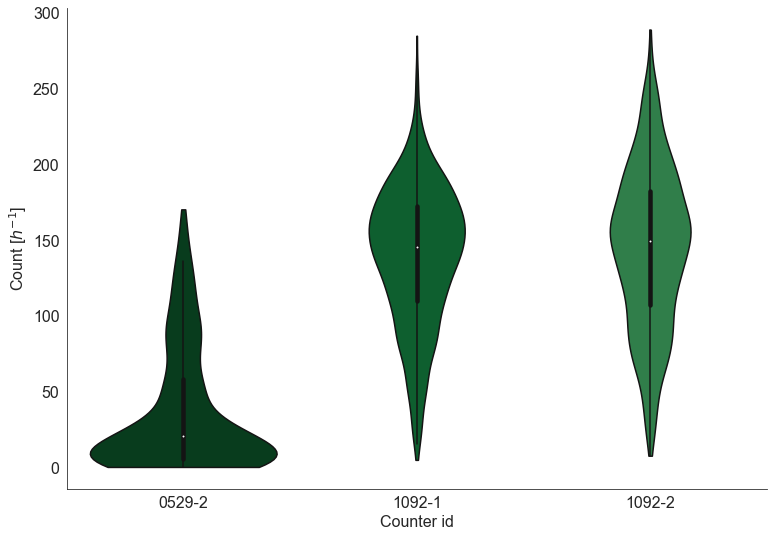

In [7]:
for i in range(0, len(counter_ids), 5):
    df_small = df[df.counter_id.map(lambda x: x in counter_ids[i:i+5])]
    sns.catplot(data=df_small, y='count', x='counter_id', kind="violin", cut=0)
    f = plt.gcf()
    f.set_size_inches(x_size,y_size)
    plt.xlabel("Counter id")
    plt.ylabel("Count [$h^{-1}$]")
    
    plt.savefig("figs\\counts\\telraam\\telraam_distribution_counts_"+str(i)+".pdf", bbox_inches="tight")
    plt.savefig("figs\\counts\\telraam\\telraam_distribution_counts_"+str(i)+".svg", bbox_inches="tight")
    plt.savefig("figs\\counts\\telraam\\telraam_distribution_counts_"+str(i)+".png")
    

### Workdays

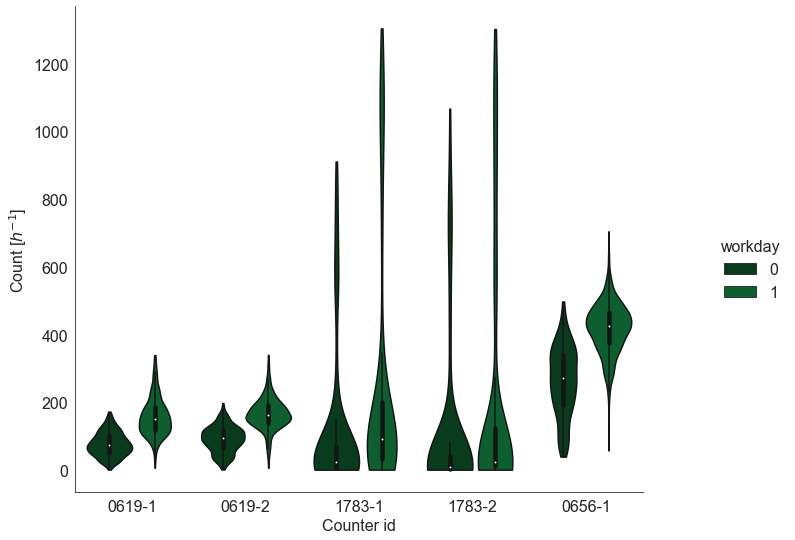

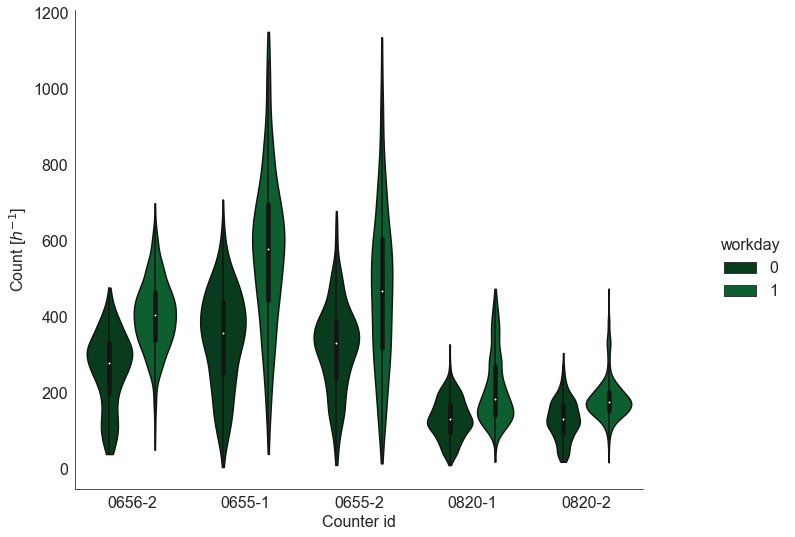

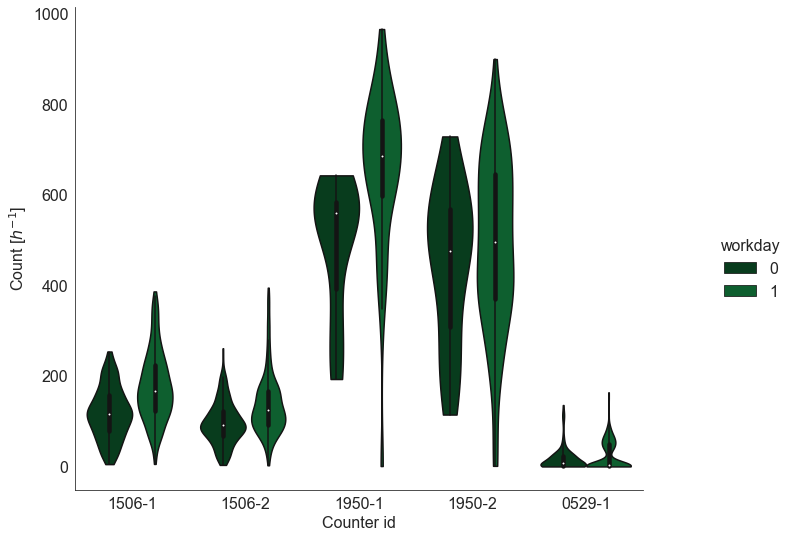

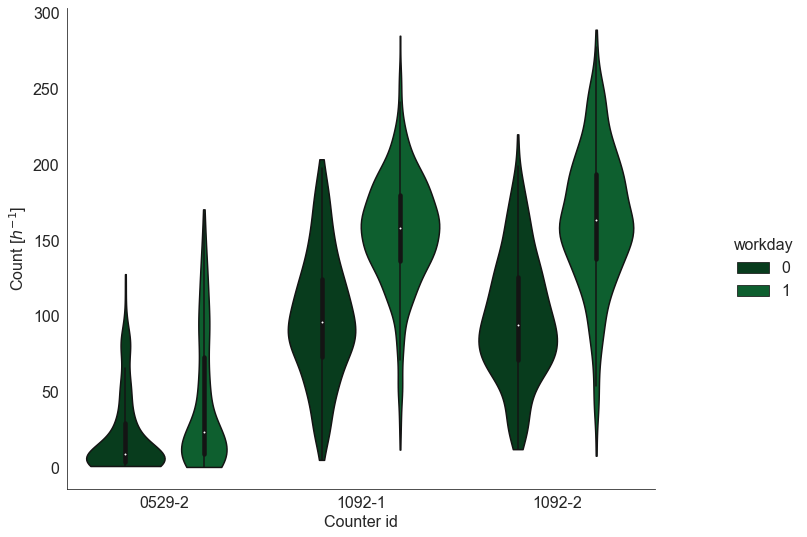

In [8]:
for i in range(0, len(counter_ids), 5):
    df_small = df[df.counter_id.map(lambda x: x in counter_ids[i:i+5])]
    sns.catplot(data=df_small, y='count', x='counter_id', hue="workday", kind="violin", cut=0)
    f = plt.gcf()
    f.set_size_inches(x_size,y_size)
    plt.xlabel("Counter id")
    plt.ylabel("Count [$h^{-1}$]")
    #plt.xticks
    plt.savefig("figs\\counts\\telraam\\telraam_distribution_counts_workdays_"+str(i)+".pdf", bbox_inches="tight")
    plt.savefig("figs\\counts\\telraam\\telraam_distribution_counts_workdays_"+str(i)+".svg", bbox_inches="tight")
    plt.savefig("figs\\counts\\telraam\\telraam_distribution_counts_workdays_"+str(i)+".png")
    plt.show()

### Weather

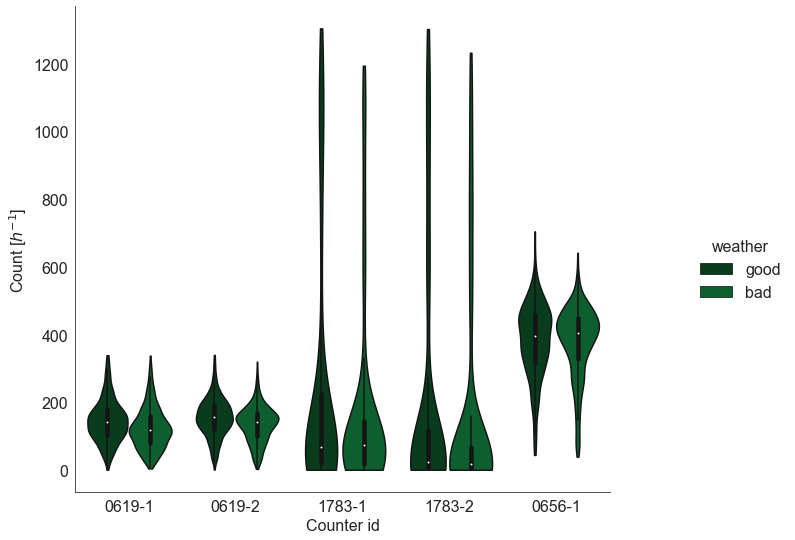

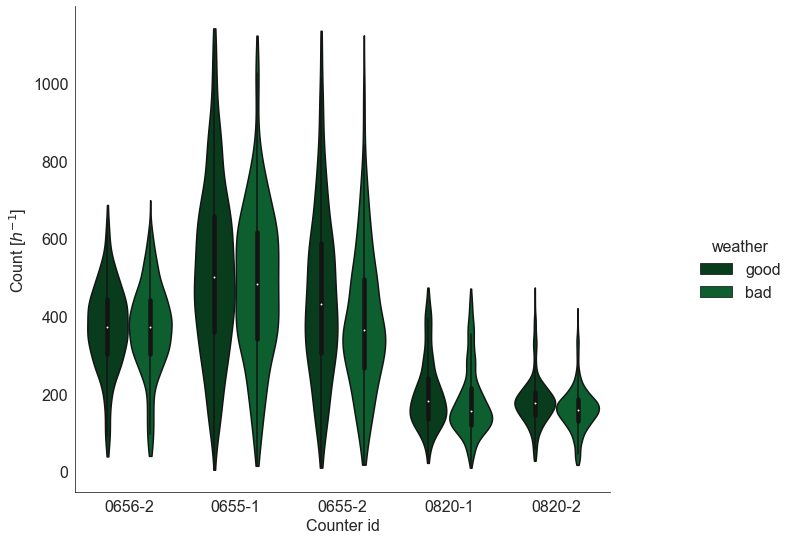

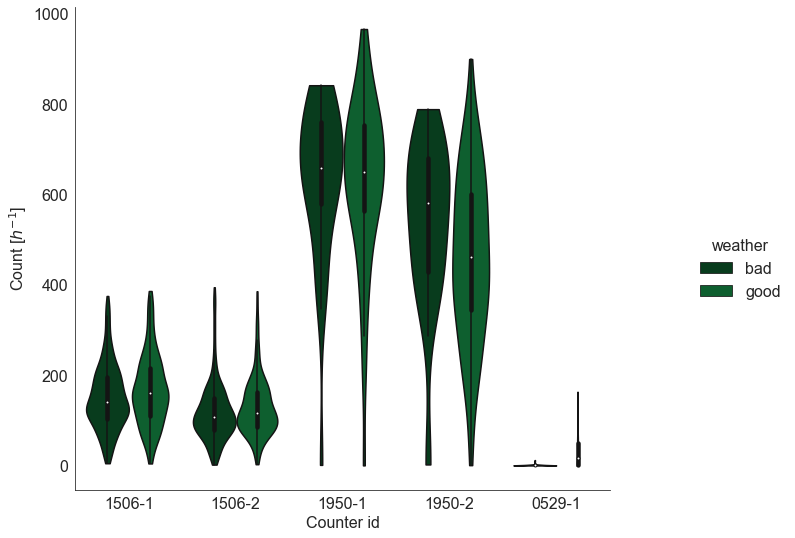

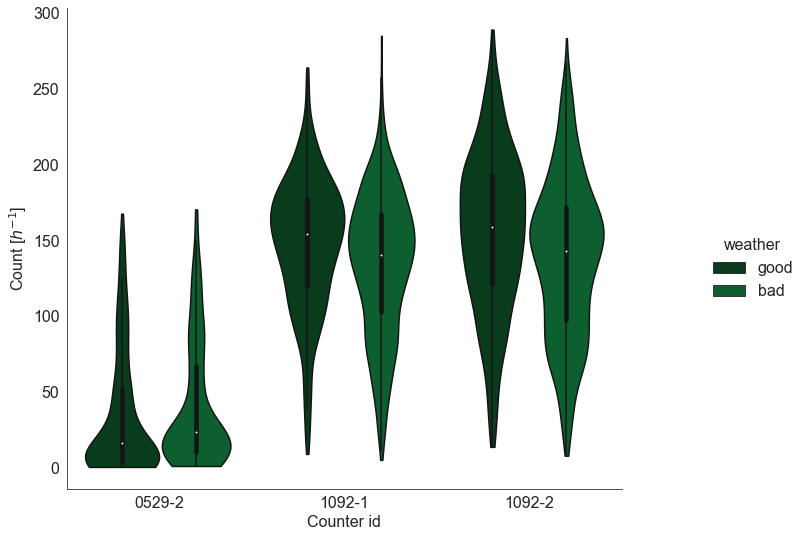

In [9]:
for i in range(0, len(counter_ids), 5):
    df_small = df[df.counter_id.map(lambda x: x in counter_ids[i:i+5])]
    sns.catplot(data=df_small, y='count', x='counter_id', hue="weather", kind="violin", cut=0)
    f = plt.gcf()
    f.set_size_inches(x_size,y_size)
    plt.xlabel("Counter id")
    plt.ylabel("Count [$h^{-1}$]")
    
    plt.savefig("figs\\counts\\telraam\\telraam_distribution_counts_weather_"+str(i)+".pdf", bbox_inches="tight")
    plt.savefig("figs\\counts\\telraam\\telraam_distribution_counts_weather_"+str(i)+".svg", bbox_inches="tight")
    plt.savefig("figs\\counts\\telraam\\telraam_distribution_counts_weather_"+str(i)+".png")
    
    plt.show()

## Histplot

## Separated by a direction

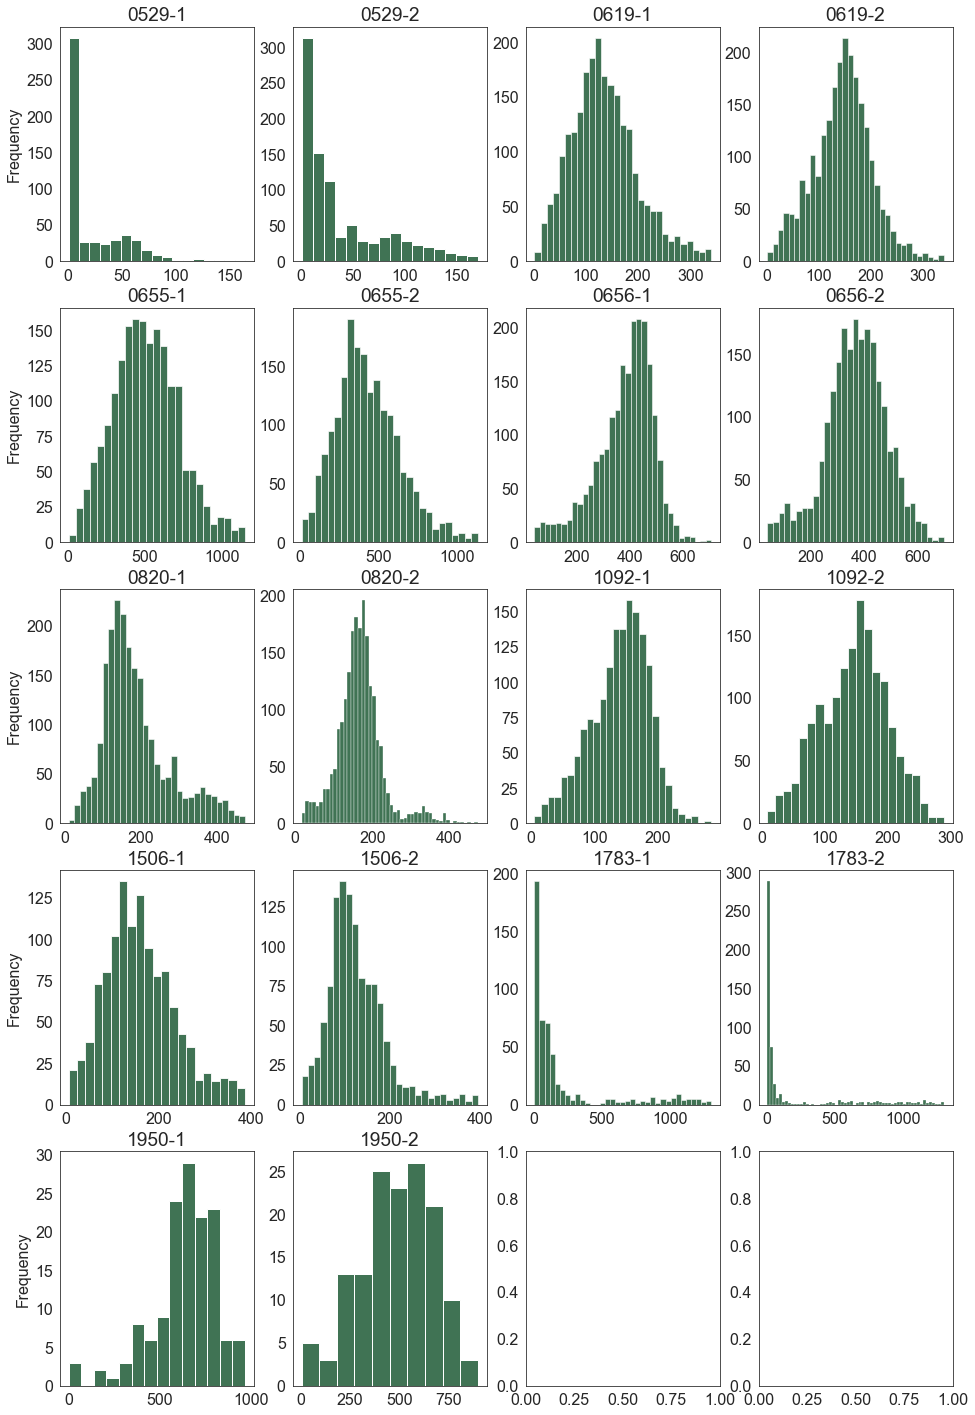

In [10]:
counters_ids = counter_ids.sort()

ncols = 4
fig, axes = plt.subplots(ncols = ncols, nrows = int(np.ceil(len(counter_ids)/ncols)))
axes = axes.flatten()         
fig.set_size_inches(16, 25)

for i, (ax, counter_id) in enumerate(zip(axes, counter_ids)):
    sns.histplot(data=df[df['counter_id'] == counter_id], x="count", ax = ax)
    #ax.set_xlabel(counter_id)
    #ax.set_xlabel("Count")
    ax.set_xlabel("")
    ax.set_title(counter_id)
    if i % ncols:
        ax.set_ylabel("")
    else:
        ax.set_ylabel("Frequency")
        
plt.savefig("figs\\counts\\telraam\\telraam_hist_directions.pdf", bbox_inches="tight")
plt.savefig("figs\\counts\\telraam\\telraam_hist_directions.svg", bbox_inches="tight")
plt.savefig("figs\\counts\\telraam\\telraam_hist_directions.png")
        
plt.show()

## Not separated by a direction

In [11]:
counter_ids2 = list(set(map(lambda x: x.split("-")[0], counter_ids)))
counter_ids2.sort()

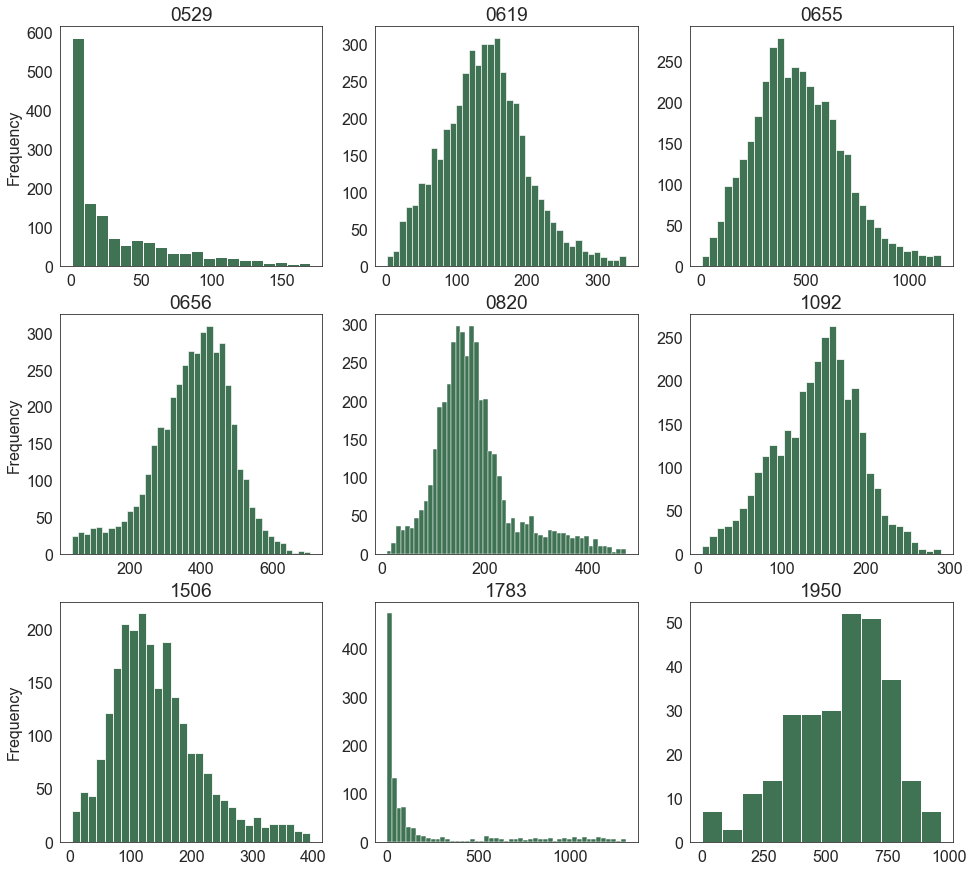

In [13]:
ncols = 3
fig, axes = plt.subplots(ncols = ncols, nrows = int(np.ceil(len(counter_ids2)/ncols)))
axes = axes.flatten()         
fig.set_size_inches(16, 15)

for i, (ax, counter_id) in enumerate(zip(axes, counter_ids2)):
    sns.histplot(data=df[df['counter_id'].str.startswith(counter_id)], x="count", ax = ax)
    ax.set_xlabel("")
    ax.set_title(counter_id)
    if i % ncols:
        ax.set_ylabel("")
    else:
        ax.set_ylabel("Frequency")

plt.savefig("figs\\counts\\telraam\\telraam_hist.pdf", bbox_inches="tight")
plt.savefig("figs\\counts\\telraam\\telraam_hist.svg", bbox_inches="tight")
plt.savefig("figs\\counts\\telraam\\telraam_hist.png")

plt.show()